# Сборный проект. Анализ и прогноз продаж по компьютерным играм.

## Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Имеются данные до 2016 года. Нужно отработать принцип работы с данными. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».



### Описание имеющихся данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Этапы работы и поставленные задачи

Этапы:

1. Чтение файла с данными и изучение общей информации
2. Предобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Общий вывод и рекомендации

## Изучение данных

Для работы с данными импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st
import math
import seaborn as sns
from plotly import graph_objects as go

### Прочтение файла и просмотр первых строк полученной таблицы

In [2]:
df = pd.read_csv('~/Desktop/project_files/games.csv')
df.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

### Изучение общей информации по датафрейму

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Исходя из общей информации видно, что в данных имеются пропуски, типы данных не соответствуют, а также названия столбцов необходимо привести к нижнему регистру.

## Предобработка данных

### Изменение названий столбцов

Для удобства приведем названия всех столбцов к нижнему регистру:

In [4]:
df.columns = df.columns.str.lower()

### Работа с пропусками и изменение типов данных

Посмотрим на количество пропусков в нашей таблице данных и в каких столбцах они присутствуют:

In [5]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Будем обрабатывать пропуски по порядку, а также приводить сведения к нужному типу данных.

#### Работа с данными в столбце "name"

Для начала выведем пустые строки и посмотрим на них.

In [6]:
df[df['name'].isnull()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

Видно, что пропуски в столбце названий игр совпадают с пропусками в столбце жанр. Также отсутствуют данные о рейтингах. Исходя из сказанного, правильным решением считаю удалить эти строки, так как их всего 2 и информации они практически не несут.

In [7]:
df = df.dropna(subset = ['name']).reset_index()

#### Работа с данными в столбце "year_of_release"

Всего в данном столбце 269 пропусков. Так как год - это целочисленные сведения, сразу изменим тип данных.

In [8]:
df = df.astype({"year_of_release": "Int64"})

Для удобства я заполню пропуски нулями.

In [9]:
df['year_of_release'] = df['year_of_release'].fillna(0)

Так как игры выпускались на разных платформах и в разных года, то мы попробуем восстановить часть пропущенных данных. Создадим функцию.

In [10]:
def year_func(row):
    year = row['year_of_release']
    
    if year == 0:
        year = temp.loc[row['name'],'year_of_release']
        return year
    else:
        return row.year_of_release
temp = df.pivot_table(index='name', values='year_of_release', aggfunc='max')
df['year_of_release'] = df.apply(year_func, axis=1)

Ниже я вывела строки, где так и остались 0, их 146. Так как год выпуска - это основной показатель в наших исследованиях, мне придется удалить эти строки, потому что не смогу их применить при анализе, они будут искажать картину и выводы по ним не сформулируешь.

In [11]:
len(df.query('year_of_release == 0'))

146

In [12]:
df = df.query('year_of_release != 0').reset_index(drop=True)

#### Работа с данными в столбце "critic_score"

Вспомним, что столбец critic_score - это оценка критиков. У нас по этому столбцу 8578 пропусков. Я думаю, что неверно заполнять пропуски медианными или средними значениями, так как возможно определенные игры вообще не были оценены критиками. Вместе с тем, игры начинаются с 1980 года, поэтому можно также предположить, что ранее игры вообще не оценивались критиками. Удалять столько строк тоже смысла нет, мы потеряем много данных, поэтому мы заменим на определенное число и будем иметь это ввиду при дальнейших исследованиях.

In [13]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 13.])

Выше, я вывела все уникальные значения по данному столбцуи и увидела, что эти данные также можно привести к целочисленному типу данных. При этом, среди оценок нет 0, поэтому мы заполним пропуски 0 и будем иметь ввиду, что при таковом значении у нас данные отсутствуют.

In [14]:
df = df.astype({"critic_score": "Int64"})

In [15]:
df['critic_score'] = df['critic_score'].fillna(0)

#### Работа с данными в столбце "user_score"

user_score - это оценка пользователей. По ним у нас 6701 пропуск.

In [16]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Выше, я вывела все уникальные сведения по этому столбцу. Видно, что в данных имеется аббревиатура 'tbd'. Согласно определению, tbd - абревиатура для ещё не вышедших игр, а также тех, где рейтинг не определен, отсутствует по разным причинам. В этом случае мы также не можем заполнить пропуски медианными или средними значениями.

In [17]:
df['user_score'].value_counts()

tbd    2394
7.8     324
8       288
8.2     279
8.3     253
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Оценка 0 встречается лишь раз. Предположу, что скорее всего это означает отсутствие сведений, поэтому все пропуски и значения 'tbd' заполним нулями и также будем это иметь ввиду при дальнейшем исследовании.

In [18]:
df['user_score'] = df['user_score'].fillna(0)

In [19]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = 0

Теперь изменим тип данных в данном столбце с object на float64:

In [20]:
df = df.astype({"user_score": "float64"})

#### Работа с данными в столбце "rating"

Для начала посмотрим какие значения у нас есть.

In [21]:
df['rating'].value_counts()

E       3958
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

Столбец rating содержит данные ESRB. Этот рейтинг дейтвителен преимущественно в США и Канаде, а в таблице данные игр и других локаций и в большом количестве, поэтому пропуски в данном случае - это нормально. Для удобства заменим их на TBD, это будет означать, что рейтинг отсутствует.

In [22]:
df['rating'].fillna('tbd', inplace=True)

Проверим еще раз общую информацию и посмотрим как изменились данные.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16567 non-null  int64  
 1   name             16567 non-null  object 
 2   platform         16567 non-null  object 
 3   year_of_release  16567 non-null  int64  
 4   genre            16567 non-null  object 
 5   na_sales         16567 non-null  float64
 6   eu_sales         16567 non-null  float64
 7   jp_sales         16567 non-null  float64
 8   other_sales      16567 non-null  float64
 9   critic_score     16567 non-null  Int64  
 10  user_score       16567 non-null  float64
 11  rating           16567 non-null  object 
dtypes: Int64(1), float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [24]:
df.isna().sum()

index              0
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Типы данных теперь приведены к нужным, пропуски заполнены.

### Рассчет суммарных продаж во всех регионах

Теперь мы подсчитаем общее число проданных копий по всем регионам, создав новый столбец, в котором суммируем продажи всех регионов.

In [25]:
df['all_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [26]:
df.head()

index                      name platform  year_of_release         genre  \
0      0                Wii Sports      Wii             2006        Sports   
1      1         Super Mario Bros.      NES             1985      Platform   
2      2            Mario Kart Wii      Wii             2008        Racing   
3      3         Wii Sports Resort      Wii             2009        Sports   
4      4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   

   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     41.36     28.96      3.77         8.45            76         8.0      E   
1     29.08      3.58      6.81         0.77             0         0.0    tbd   
2     15.68     12.76      3.79         3.29            82         8.3      E   
3     15.61     10.93      3.28         2.95            80         8.0      E   
4     11.27      8.89     10.22         1.00             0         0.0    tbd   

   all_sales  
0      82.54  
1      40.24  
2      35.52  
3      32.77  
4      31.38

## Исследовательский анализ

### Анализ выпущенных игр по годам

Создадим сводную таблицу по годам и посчитаем количество выпущенных игр.

In [27]:
df_games = df.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
df_games.head()

year_of_release  name
0             1980     9
1             1981    46
2             1982    36
3             1983    17
4             1984    14

Исходя их полученных данных видно, что резкий скачек по выпуску игр был в 2002 году, после чего был небольшой спад и начиная с 2005 до 2011 были самые высокие показатели за исследуемый период, потом резкий спад. Посмотрим для наглядности на графике.

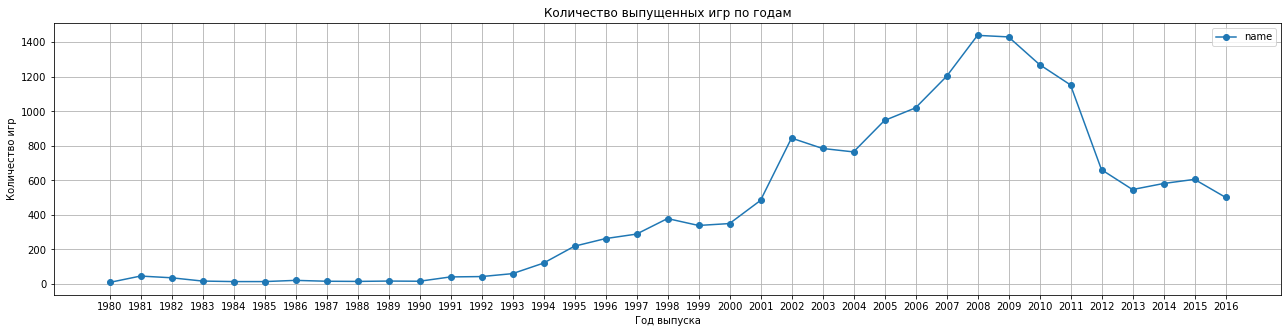

In [28]:
df_games.plot(y='name', grid=True, style='o-', figsize=(22, 5))
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.xticks(np.arange(len(df_games)), df_games['year_of_release'])
plt.show()

Исходя из графика также можно сделать вывод, что до 2000 годов игр выпускалось крайне мало. Это связано с тем, что на тот момент были слабые технологии, консолей для игр было также мало и они были дорогие. Персональные компьютеры были доступны незначительной категории граждан. Далее, с развитием технологий, начинается резкий скачок по продажам. Но, чем больше развитие, тем больше требования к играм, поэтому после подъема начинается спад. Это также обусловленно тем, что ранее игры были проще в разработке, на их создание уходило меньше времени. С развитием индустрии и запросом пользователей, многие игры создаются не один год, поэтому игр выпускается меньше. Вместе с тем, могу предположить, что пики 2008-2009 годов связаны с мировым кризисом, люди теряли работу, переживали стресс и поэтому был высокий спрос на игры.

### Анализ платформ по количеству игр и годам.

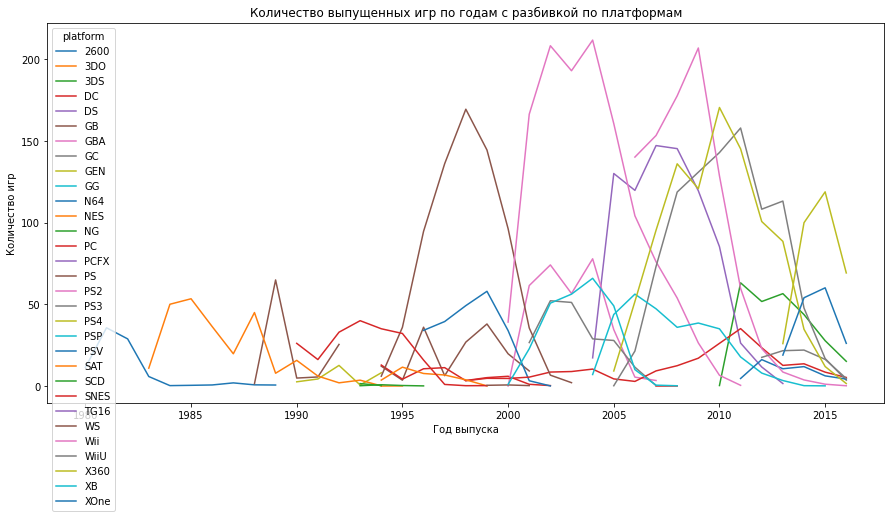

In [29]:
(df.pivot_table(index = 'year_of_release', columns = 'platform', values= 'all_sales', aggfunc = 'sum')
 .plot(figsize = (15,7))
)
plt.title('Количество выпущенных игр по годам с разбивкой по платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

На данном графике можно увидеть, что у большинства платформ есть пики по продажам, а потом спады. Это связано с созданием новых платформ, которые поддерживают более современные технологии, в том числе более качественную графику. График это четко показывает, к примеру, если обратить внимание на платформы PS2 и PS3.

### Анализ платформ с наибольшими суммарными продажами.

Чтобы определить платформы с наибольшими продажами, создадим сводную таблицу по названию платформы и суммы общих продаж, далее отсортируем по убыванию и посмотрим на результат.

In [30]:
df_platform_rev = pd.pivot_table(df, index=['platform'], values='all_sales', aggfunc='sum')
df_platform_rev = df_platform_rev.sort_values('all_sales',ascending=False)
df_platform_rev.head(10)

all_sales
platform           
PS2         1247.16
X360         966.61
PS3          935.19
Wii          903.31
DS           804.28
PS           727.58
PS4          314.14
GBA          313.73
PSP          293.57
PC           258.86

Исходя из полученных данных, выделяется 6 платформ с наибольшим количеством проданных копий, выведем их в список.

In [31]:
best_df_platform_rev = list(df_platform_rev.index[:6])
best_df_platform_rev

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

### Анализ 6-ти самых прибыльных платформ за весь период.

Разберем каждую платформу по отдельности. Для оптимизации создадим функции, одна будет принимать на вход название платформы и возвращать сводную таблицу, а вторая будет возвращать график по ней:

In [32]:
def pivot_table(platform):
    return df[df['platform'] == platform].pivot_table(
                              index=['year_of_release'],
                              values='all_sales',
                              aggfunc='sum').reset_index()

In [33]:
def plot(data):
    data.plot(x = 'year_of_release', y='all_sales', grid=True, style='o-', figsize=(15, 5))
    plt.title('График объема продаж по годам')
    plt.xlabel('Год выпуска')
    plt.ylabel('Количество проданных копий в миллионах')
    plt.show()

Функции готовы, теперь для каждой популярной платформы применим их:

#### Платформа PS2

In [34]:
platform_PS2 = pivot_table("PS2")
platform_PS2

year_of_release  all_sales
0              2000      39.17
1              2001     166.43
2              2002     208.36
3              2003     193.05
4              2004     211.81
5              2005     160.66
6              2006     104.24
7              2007      76.10
8              2008      53.90
9              2009      26.40
10             2010       6.59
11             2011       0.45

Выше видно, что данная платформа продавала большое количество копий в течение 7-ти лет. С 2002 по 2004 имела высокие продажи. Ниже график также отображает эту картину. 

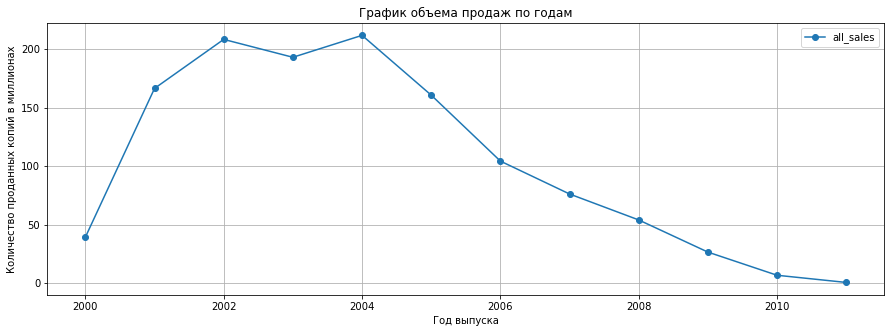

In [35]:
plot(platform_PS2)

#### Платформа X360

In [36]:
platform_X360 = pivot_table("X360")
platform_X360

year_of_release  all_sales
0              2005       9.22
1              2006      51.79
2              2007      95.41
3              2008     136.07
4              2009     120.82
5              2010     170.55
6              2011     145.23
7              2012     100.72
8              2013      88.58
9              2014      34.74
10             2015      11.96
11             2016       1.52

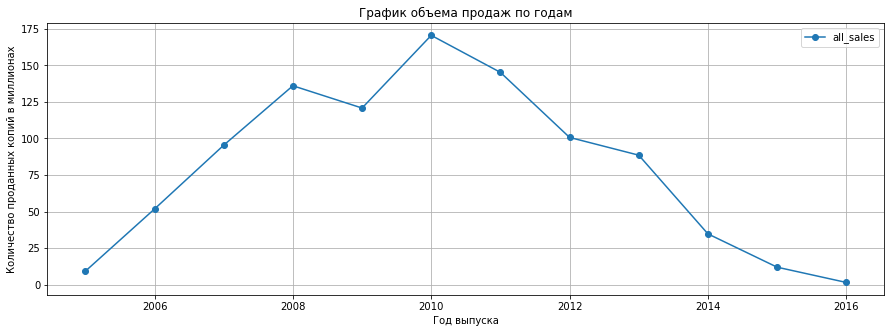

In [37]:
plot(platform_X360)

Если брать платформу X360, то она приносила более менее стабильный доход в виде проданных копий в течение 8 лет (с 2006 по 2013 гг). Пикпродаж приходится на 2010 год. В настоящее время продажи незначительны.

#### Платформа PS3

In [38]:
platform_PS3 = pivot_table("PS3")
platform_PS3

year_of_release  all_sales
0              2005       0.19
1              2006      21.44
2              2007      73.19
3              2008     118.79
4              2009     130.93
5              2010     142.96
6              2011     157.98
7              2012     108.28
8              2013     113.25
9              2014      47.76
10             2015      16.82
11             2016       3.60

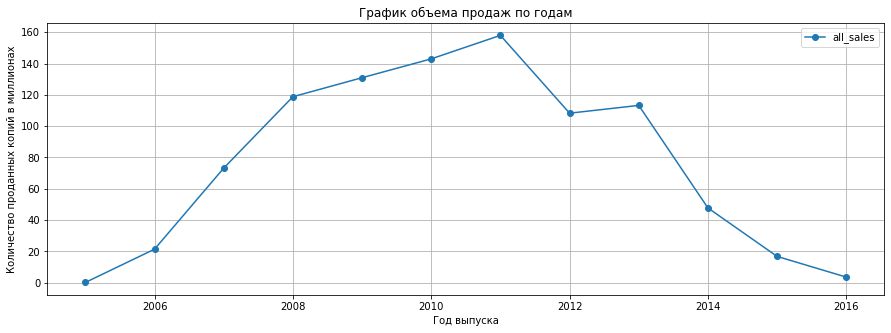

In [39]:
plot(platform_PS3)

Платформа PS3 в течение 7-8 лет приносила хороший доход от проданных копий (пик продаж - 2011 год), но как ранее я показывала на графике, с приходом нового поколения, она устарела и количество проданных копий падает. На смену ей пришла платформа PS4.

#### Платформа Wii

In [40]:
platform_Wii = pivot_table("Wii")
platform_Wii

year_of_release  all_sales
0              2006     140.19
1              2007     153.41
2              2008     177.68
3              2009     206.97
4              2010     128.67
5              2011      59.79
6              2012      22.94
7              2013       8.59
8              2014       3.75
9              2015       1.14
10             2016       0.18

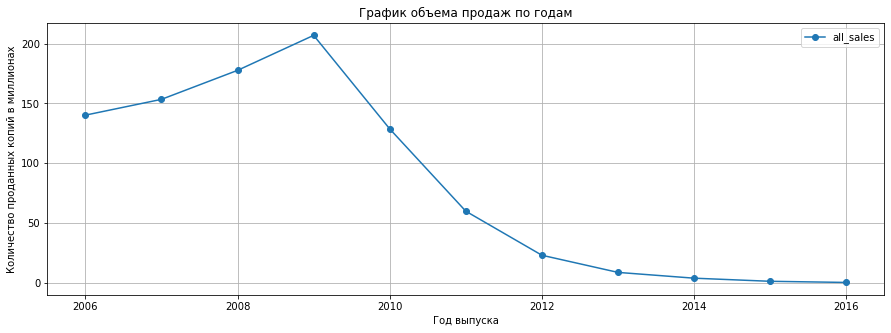

In [41]:
plot(platform_Wii)

У платформы Wii самый плодотворный период был в течение 5-ти лет (с 2006 по 2010 гг). Пик приходится на 2009 год.

#### Платформа DS

In [42]:
platform_DS = pivot_table("DS")
platform_DS

year_of_release  all_sales
0              1985       0.02
1              2004      17.27
2              2005     130.14
3              2006     119.81
4              2007     147.23
5              2008     145.36
6              2009     119.56
7              2010      85.35
8              2011      26.33
9              2012      11.67
10             2013       1.54

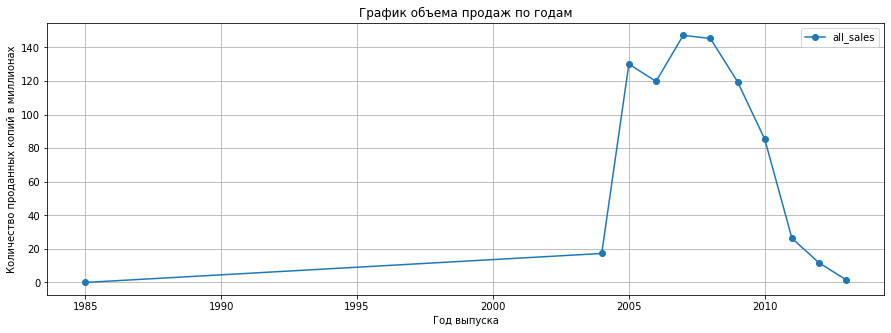

In [43]:
plot(platform_DS)

Платформа DS продавала наибольшее количество копий в течение 6-ти лет (с 2005 по 2010 гг). Пик продаж приходится на 2007-2008 гг.

#### Платформа РS

In [44]:
platform_PS = pivot_table("PS")
platform_PS

year_of_release  all_sales
0             1994       6.03
1             1995      35.96
2             1996      94.70
3             1997     136.17
4             1998     169.49
5             1999     144.53
6             2000      96.37
7             2001      35.59
8             2002       6.67
9             2003       2.07

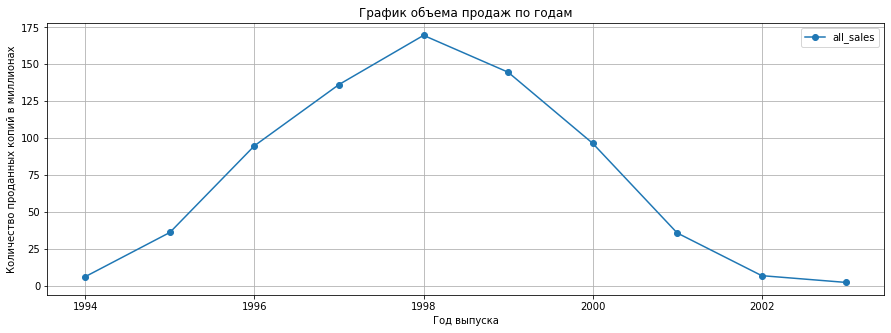

In [45]:
plot(platform_PS)

Платформа PS определенно является долгожителем, это не удивительно, она была очень популярна, но все равно на смену ей пришли более современные замены, такие как PS2, а после PS3, сейчас PS4.

Краткий вывод по платформам за весь период: Самые популярные платформы: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', платформы с наименьшим количеством проданных копий: "SCD", "NG", "WS", "TG16", "3DO", "GG", "PCFX".

### Определение активной продолжительности эксплуатации платформ

Давайте посмотрим на срок жизни всех платформ по отдельности, чтобы далее определить средний срок их жизни.

In [46]:
pl_age = (df.loc[:,['year_of_release', 'platform']]
        .drop_duplicates()
        .pivot_table(index=['platform'], values='year_of_release', aggfunc='count')
        .reset_index()
       )
pl_age.head()

platform  year_of_release
0     2600               11
1      3DO                2
2      3DS                7
3       DC                7
4       DS               11

Для наглядности построим еще график по продолжительности жизни на рынке.

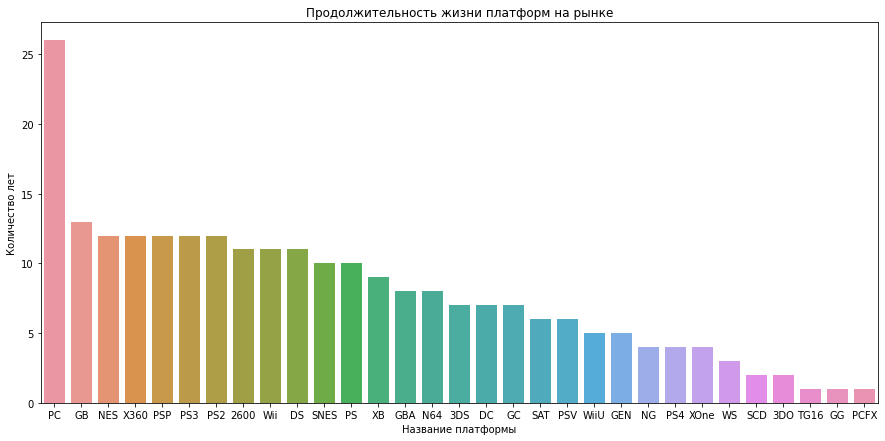

In [47]:
plt.figure(figsize=(15, 7))
sns.barplot(x='platform', y='year_of_release', data = pl_age.sort_values(by='year_of_release', ascending=False))
plt.title('Продолжительность жизни платформ на рынке')
plt.xlabel('Название платформы')
plt.ylabel('Количество лет')
plt.show()

С большим отрывом лидирует PS. Также, необходимо помнить, что некоторые платформы выпущены не так давно и картину полностью не отображают по продолжительности. Давайте применим метод describe() и посмотрим общую информацию по распределению.

In [48]:
pl_age['year_of_release'].describe() 

count    31.000000
mean      7.806452
std       5.114811
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: year_of_release, dtype: float64

Я бы определила средний срок платформы 6-8 лет. Но также могу предположить, что с каждым годом он будет уменьшаться. Это связано с развитием технологий, улучшенной графикой, общим развитием общества, включающее улучшение благосостояния в целом. Многие вещи становятся более доступными, и смена платформ на более современную является обыденным. Развитие игр приводит к тому, что платформы старого поколения не могут их поддерживать либо отражать современные технологии, поэтому им на смену приходят обновленные и улучшенные версии платформ. Исходя из моих выводов, я определяю для себя актуальный период с 2013 года.

### Определение популярных платформ в актуальный период

Давайте теперь рассмотрим самые популярные платформы с 2013 года.

In [49]:
top_rev = (df.query('year_of_release >= 2013')
             .pivot_table(index=['platform'], values='all_sales', aggfunc='sum')
             .reset_index()
             .sort_values('all_sales',ascending=False)
          )
top_rev

platform  all_sales
4       PS4     314.14
3       PS3     181.43
10     XOne     159.32
0       3DS     143.25
9      X360     136.80
8      WiiU      64.63
2        PC      40.06
6       PSV      32.99
7       Wii      13.66
5       PSP       3.74
1        DS       1.54

Здесь конечно лидирует PS4 и с большим отрывом, неудивительно, ведь все поколения PlayStation пользовались огромной популярностью и PS4 является последней версией, она вышла в ноябре 2013 года и приносит огромную прибыль компании, а старое поколение PS3 было тоже популярно, но сейчас оно идет на спад. Платформа XOne (Xbox One) вышла также в ноябре 2013 года и продает большое количество копий, по сути это ближайший конкурент PlayStation. Платформа X360 вышла в 2005 году, но до сих пор приносит хорошую прибыль, но я думаю, что в ближайшем будущем эта консоль перестанет быть актуальной. Еще, рассмотрим платформу WiiU, она выпущена в ноябре 2012 года. Учитывая, что игры на данной приставке проще и дешевле, да и сама платформа в изготовлении бюджетнее, она продает хорешее количество для своих характеристик.

Визуализируем данные с учетом времени:

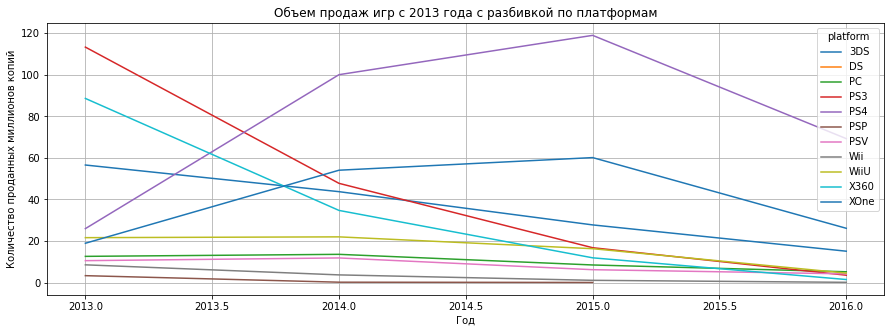

In [50]:
(df.query('year_of_release >= 2013')
   .pivot_table(index='year_of_release',
                columns='platform',
                values= 'all_sales',
                aggfunc='sum')
   .plot(grid=True, figsize=(15, 5))
)
plt.title('Объем продаж игр с 2013 года с разбивкой по платформам')
plt.xlabel('Год')
plt.ylabel('Количество проданных миллионов копий')
plt.show()

На графике также выделяются платформы PS4 и XOne, которые приносят высокую прибыль своим компаниям. На графике также видно, что с 2016 года начался спад. Причинами этого может быть множество факторов, такие как ожидание новых игр (в связи с ростом технологий, игры стали много сложнее в создании, многие из них создаются в течение нескольких лет), так и мы можем предположить, что у нас не все данные по 2016 году, может быть и вообще спада нет. На реальной практике, нужно конечно такие моменты уточнять. 

In [51]:
top_plat_2013_2016 = list(top_rev.index[:6])
top_plat_2013_2016

[4, 3, 10, 0, 9, 8]

### Глобальные продажи игр в разбивке по платформам.

Создадим для этого исследования отдельную таблицу.

In [52]:
actual_games = df.query('year_of_release >= 2013')
actual_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 16 to 16566
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            2237 non-null   int64  
 1   name             2237 non-null   object 
 2   platform         2237 non-null   object 
 3   year_of_release  2237 non-null   int64  
 4   genre            2237 non-null   object 
 5   na_sales         2237 non-null   float64
 6   eu_sales         2237 non-null   float64
 7   jp_sales         2237 non-null   float64
 8   other_sales      2237 non-null   float64
 9   critic_score     2237 non-null   Int64  
 10  user_score       2237 non-null   float64
 11  rating           2237 non-null   object 
 12  all_sales        2237 non-null   float64
dtypes: Int64(1), float64(6), int64(2), object(4)
memory usage: 246.9+ KB


У нас получилось 2237 строк для исследования. Для начала создадим общий ящик с усами по всем платформам и посмотрим общую информацию по распределениям.

count    2237.000000
mean        0.487957
std         1.234181
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: all_sales, dtype: float64

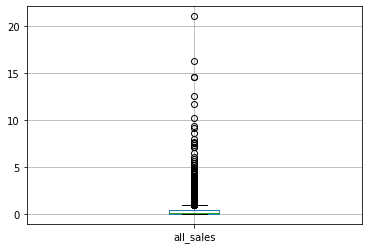

In [53]:
actual_games.boxplot(column = 'all_sales')
actual_games['all_sales'].describe()

В среднем все платформы приносит порядка 0,5 миллионов копий, но есть и рекордсмены, которые продают и по 21 млн. Также, если посмотреть на ящик, можно сделать вывод, что число проданных копий свыше 5 млн. встречаются крайне редко.

Теперь рассмотрим самые популярные платформы в актуальный период и для каждой построим ящик с усами, предварительно создав функцию:

In [54]:
def boxplot(platform):
    data_1 = actual_games[actual_games['platform'] == platform]
    data_1.boxplot(column='all_sales')
    plt.ylabel('Миллионы проданных копий')
    plt.show()
    print(data_1['all_sales'].describe())

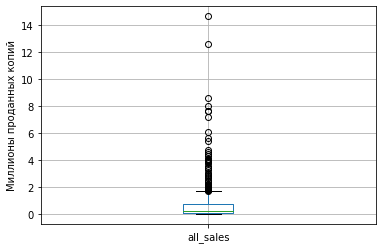

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: all_sales, dtype: float64


In [55]:
boxplot("PS4")

Если брать средние значения, то это примерно порядка 800 тысяч копий, но PS4 выпускала на своей платформе много довольно популярных игр, которые продавались тиражом свыше 14 млн. копий. Вместе с тем, данная платформа лидирует по количеству выпущенных игр, это говорит об ее актуальности и популярности.

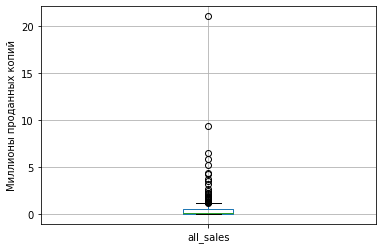

count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: all_sales, dtype: float64


In [56]:
boxplot("PS3")

У PS3 среднее количество проданных копий 525 тысяч. И кстати, у этой платформы имеется тот самый игра-рекордсмен, продано свыше 21 млн. копий.

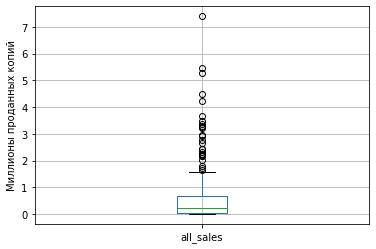

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: all_sales, dtype: float64


In [57]:
boxplot("XOne")

XOne имеет хорошие средние показатели в размере 645 тысяч копий за игру. Игр на данной платформе выпускается в полтора раза меньше, чем на РS4, но она является, как ранее говорила, ближайшим конкурентом РS4.

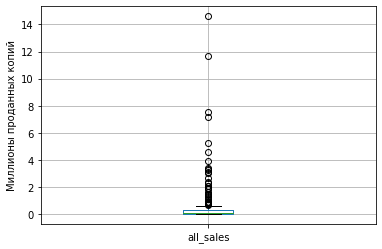

count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: all_sales, dtype: float64


In [58]:
boxplot("3DS")

Средний показатель платформы 3DS - 472 тысячи копий. Данная платформа выпущена в марте 2011 года и исходя из продолжительности срока актуальности платформ, в 2017 году популярность ее будет низкая. 

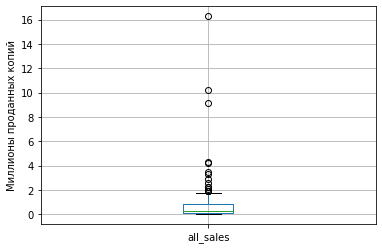

count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: all_sales, dtype: float64


In [59]:
boxplot("X360")

У платформы X360 довольно неплохие средние показатели за указанный период (свыше 700 тысяч копий), но она уже устарела и теряет свою популярность.

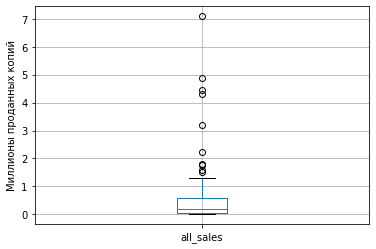

count    115.000000
mean       0.562000
std        1.038778
min        0.010000
25%        0.060000
50%        0.200000
75%        0.595000
max        7.090000
Name: all_sales, dtype: float64


In [60]:
boxplot("WiiU")

Я бы обратила внимание также на платформу WiiU. На ней выпускается небольшое количество игр, но средние показатели по продажам довольно высокие(562 тысячи проданныз копий за игру). 

Краткий вывод: больше всего игр выпускается на платформе PS4, меньше всего WiiU, но эти платформы не совсем корректно сравнивать, так как характеристики у них разные, выпускаемые игры тоже. WiiU является беспроводной приставкой для простых игр, в отличие от PS4.

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>
    
Хорошие графики, но дам совет: можно снижать их вернюю планку, чтобы были лучше видны квантили и т.д.

### Влияние отзывов пользователей и критиков на продажи внутри платформы

#### PS3: влияние отзывов пользователей и оценок критиков

Для примера возьмем платформу PS3, так как она давно на рынке, очень популярна, поэтому по ней информации для исследования будет много.

Для всего дальнейшего исследования мы будем помнить, что в самом начале мы пропуски заменили на 0, поэтому их мы не будем учитывать, чтобы не искажать картину.

In [61]:
game_ps3 = df[(df['platform'] == 'PS3') & (df['critic_score'] > 0)].reset_index(drop=True)

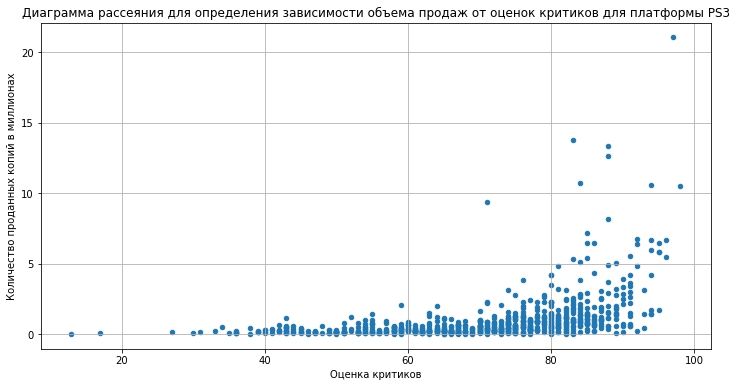

In [62]:
game_ps3.plot(kind='scatter', x='critic_score', y='all_sales', figsize=(12,6))
plt.title('Диаграмма рассеяния для определения зависимости объема продаж от оценок критиков для платформы PS3')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество проданных копий в миллионах')
plt.grid()
plt.show()

Данная диаграмма рассеяния довольно четка показывается положительную зависимость отзыва критиков и количества продаж. Чем выше оценка, тем больше количество проданных копий.

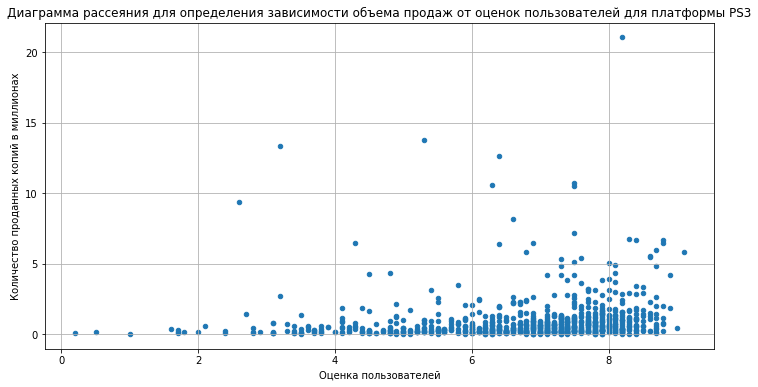

In [63]:
game_ps3 = df[(df['platform'] == 'PS3') & (df['user_score'] > 0)].reset_index(drop=True)
game_ps3.plot(kind='scatter', x='user_score', y='all_sales', figsize=(12,6))
plt.title('Диаграмма рассеяния для определения зависимости объема продаж от оценок пользователей для платформы PS3')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество проданных копий в миллионах')
plt.grid()
plt.show()

Здесь также наблюдается тенденция положительной зависимости, но меньше. Достаточно много игр, которые имеют низкие оценки пользователей, при этом хорошо продаются. Возможно, это связано с рекламой данных игр. Также можно предположить, что пользователь покупает игру, она ему не нравится, он ставит низкую оценку.

In [64]:
game_ps3 = df[(df['platform'] == 'PS3') & (df['user_score'] > 0) & (df['critic_score'] > 0)].reset_index(drop=True)


Теперь посмотрим на корреляцию данных показателей.

In [65]:
print(game_ps3.loc[:, ['user_score', 'critic_score', 'all_sales']].corr())

              user_score  critic_score  all_sales
user_score      1.000000      0.628833   0.143322
critic_score    0.628833      1.000000   0.427692
all_sales       0.143322      0.427692   1.000000


И у критиков и у пользователей корреляция положительная, но у критиков она больше (0,43), у пользователей лишь 0,14. Получается, потенциальные покупатели больше обращают внимание на оценку критиков, нежели на отзывы. Возможно это также связано с тем, что люди зачастую считают отзывы пользователей субъективными: у всех разные вкусы и предпочтения, поэтому на них обращают внимание меньше.

#### Корреляция на популярных платформах

Далее, я не буду рисовать диаграмму рассеяния для других популярных платформ, а просто посмотрю корреляцию для всех и сравню ее.

In [66]:
game_ps4 = df[(df['platform'] == 'PS4') & (df['user_score'] > 0) & (df['critic_score'] > 0)].reset_index(drop=True)
print(game_ps4.loc[:, ['user_score', 'critic_score', 'all_sales']].corr())


              user_score  critic_score  all_sales
user_score      1.000000      0.557654  -0.033625
critic_score    0.557654      1.000000   0.405895
all_sales      -0.033625      0.405895   1.000000


У платформы PS4 даже немного отрицательная корреляция, но скорее ближе к нулю, а вот отзывы критиков имеют высокие показатели (0,56). Это говорит о том, что пользователи PS4 обращают внимание на отзывы критиков и практически не реагируют на отзывы покупателей.

In [67]:
game_XOne = df[(df['platform'] == 'XOne') & (df['user_score'] > 0) & (df['critic_score'] > 0)].reset_index(drop=True)
print(game_XOne.loc[:, ['user_score', 'critic_score', 'all_sales']].corr())


              user_score  critic_score  all_sales
user_score      1.000000      0.472462  -0.094003
critic_score    0.472462      1.000000   0.410422
all_sales      -0.094003      0.410422   1.000000


У платформы XOne схожая картина с PS4. Пользователи данной платформы также больше реагируют на отзывы критиков.

In [68]:
game_3DS = df[(df['platform'] == '3DS') & (df['user_score'] > 0) & (df['critic_score'] > 0)].reset_index(drop=True)
print(game_3DS.loc[:, ['user_score', 'critic_score', 'all_sales']].corr())

              user_score  critic_score  all_sales
user_score      1.000000      0.744286   0.232444
critic_score    0.744286      1.000000   0.338426
all_sales       0.232444      0.338426   1.000000


У платформы 3DS очень высокая зависимость продаж от оценки критиков (почти 0,75). Высокая корреляция. Также имеется зависимость от отзывов пользователей (0,23), но опять же я бы не назвала это высоким показателем.

In [69]:
game_X360 = df[(df['platform'] == 'X360') & (df['user_score'] > 0) & (df['critic_score'] > 0)].reset_index(drop=True)
print(game_X360.loc[:, ['user_score', 'critic_score', 'all_sales']].corr())

              user_score  critic_score  all_sales
user_score      1.000000      0.623261   0.109341
critic_score    0.623261      1.000000   0.387670
all_sales       0.109341      0.387670   1.000000


У платформы X360 низкие показатели корреляции продаж с отзывами покупателей (0,11) и очень высокие с оценками критиков (0,62).

In [70]:
game_WiiU = df[(df['platform'] == 'WiiU') & (df['user_score'] > 0) & (df['critic_score'] > 0)].reset_index(drop=True)
print(game_WiiU.loc[:, ['user_score', 'critic_score', 'all_sales']].corr())

              user_score  critic_score  all_sales
user_score      1.000000      0.770080   0.391848
critic_score    0.770080      1.000000   0.350882
all_sales       0.391848      0.350882   1.000000


У платформы WiiU наблюдается самая высокая корреляция продаж с оценками критиков (0,77). Это очень высокий показатель, при этом зависимость продаж от отзывов пользователей хоть и меньше, но тоже высокая (0,39).

Проанализировав корреляцию между отзывами и продажами среди 6-ти самых популярных платформ, могу сделать вывод, что потенциальные покупатели практически не обращают внимания на отзывы пользователей, в большей степени ориентируясь на оценки критиков. Поэтому оценка критиков очень важна и она влияет на продажи.

### Распределение игр по жанрам

Для данного исследования мы создадим сводную таблицу, куда включим данные за актуальный период, и отсортируем по количеству проданных копий.

In [71]:
pivot_genre = (actual_games.pivot_table(index='genre', 
                                        values='all_sales', 
                                        aggfunc=('count', 'sum', 'mean', 'median'))
                           .reset_index()
                           .sort_values('median', ascending=False)
              )
pivot_genre

genre  count      mean  median     sum
8        Shooter    187  1.245882   0.450  232.98
10        Sports    214  0.703972   0.240  150.65
4       Platform     74  0.576081   0.225   42.63
7   Role-Playing    292  0.499623   0.125  145.89
2       Fighting     80  0.441375   0.125   35.31
6         Racing     85  0.469294   0.120   39.89
0         Action    769  0.419376   0.110  322.50
3           Misc    156  0.404231   0.105   63.06
9     Simulation     62  0.350968   0.100   21.76
11      Strategy     56  0.180000   0.080   10.08
5         Puzzle     17  0.186471   0.060    3.17
1      Adventure    245  0.096490   0.030   23.64

Что касается жанра игры, то я считаю, что для каждого пользователя свой жанр или даже несколько. Если пазлы имеют самые низкие по продажам показатели (3,17 млн. копий), то это не говорит о том, что необходимо отказываться от этих игр. Но, тем не менее, я бы выделила 4 наиболее популярных жанра: Action (322,5 млн. проданных копий), Shooter (232,98 млн. копий), Sports (150,65 млн. копий) и Role-Playing (145,89 млн. копий).

Визуализируем и посмотрим на объемы продаж в процентном соотношении:

In [72]:
category = pivot_genre['genre'].tolist()
values = pivot_genre['sum'].tolist()
fig = go.Figure(data=[go.Pie(labels=category, values=values)])
fig.update_layout(
    title={
        'text': "Диаграмма распределения количества проданных копий игр по жанрам",
        'y':0.9,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

Общие продажи - не самая удачная метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи:

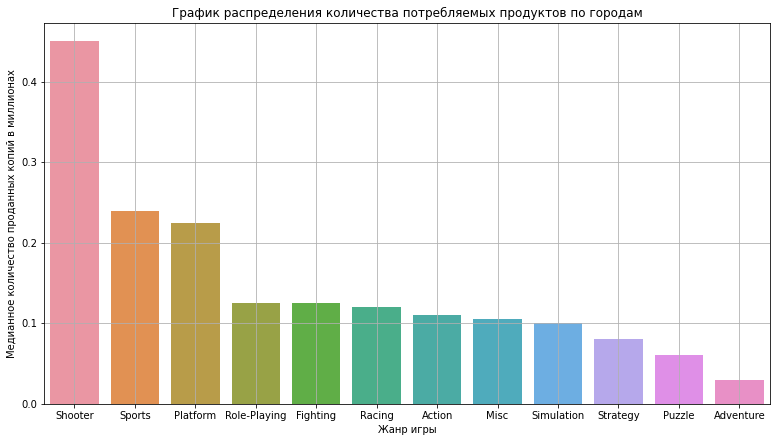

In [73]:
plt.figure(figsize=(13, 7))
sns.barplot(x='genre', y='median', data=pivot_genre.sort_values(by='median', ascending=False))
plt.title('График распределения количества потребляемых продуктов по городам')
plt.xlabel('Жанр игры')
plt.ylabel('Медианное количество проданных копий в миллионах')
plt.grid()
plt.show()

Если рассматривать медианные значения, то здесь лидирует жанры: Shooter, Sports, Platform

## Составление портрета пользователя каждого региона

### Определение топ-5 платформ для каждого региона.

Для определения самых популярных платформ в Европе, Японии и Северной Америке, создадим для каждого региона сводную по продажам и визуализируем. Для удобства также создадим соответствующие функции:

In [74]:
def pivot_region(region):
    return (actual_games.pivot_table(index='platform', values=region, aggfunc=('count', 'sum'))
            .reset_index()
            .sort_values('sum', ascending=False)
           )


In [75]:
def plot_region(table):
    plt.figure(figsize=(13, 7))
    sns.barplot(x='platform', y='sum', data=table.sort_values(by='sum', ascending=False))
    plt.title('Рейтинг платформ в регионе')
    plt.xlabel('Название платформы')
    plt.ylabel('Количество проданных копий в миллионах')
    plt.grid()
    plt.show()

#### топ-5 платформ для Северной Америки

In [76]:
actual_games_na = pivot_region('na_sales')
actual_games_na

platform  count     sum
4       PS4    392  108.74
10     XOne    247   93.12
9      X360    186   81.66
3       PS3    345   63.50
0       3DS    303   38.20
8      WiiU    115   29.21
2        PC    192   11.19
7       Wii     23    6.56
6       PSV    358    5.04
1        DS      8    0.57
5       PSP     68    0.00

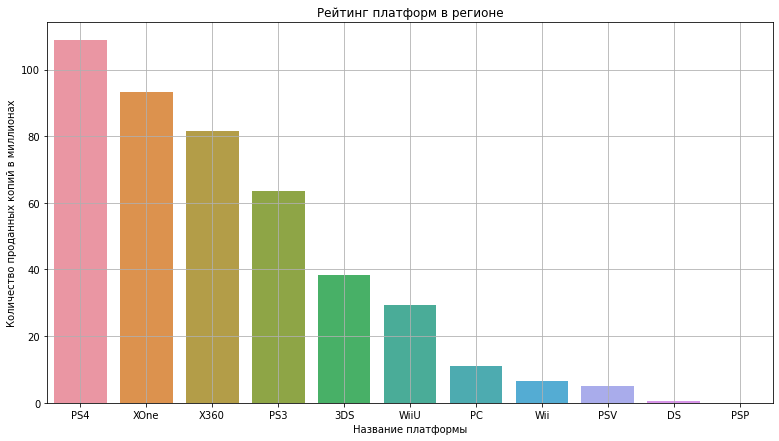

In [77]:
plot_region(actual_games_na)

Для региона Северной Америки четко видны 5 лидирующих платформ: 'PS4', 'PS3', 'XOne', '3DS', 'X360'

#### топ-5 платформ для Японии

In [78]:
actual_games_jp = pivot_region('jp_sales')
actual_games_jp

platform  count    sum
0       3DS    303  67.81
3       PS3    345  23.35
6       PSV    358  18.59
4       PS4    392  15.96
8      WiiU    115  10.88
5       PSP     68   3.53
9      X360    186   0.51
10     XOne    247   0.34
7       Wii     23   0.05
1        DS      8   0.00
2        PC    192   0.00

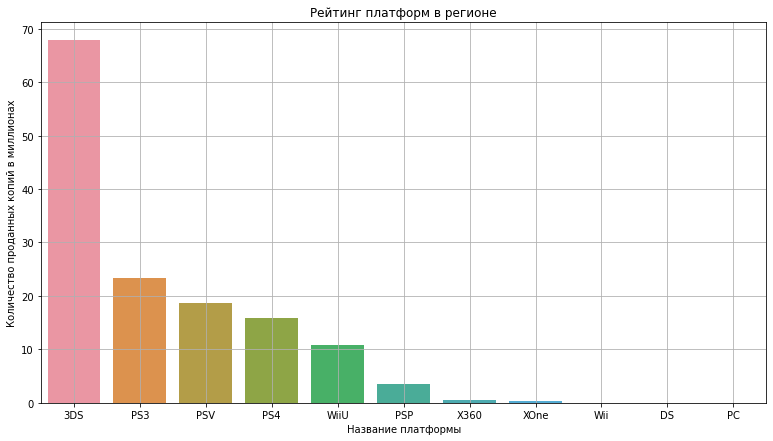

In [79]:
plot_region(actual_games_jp)

В Японии лидирует 3DS. Здесь топ-5  платформ отличаются: 3DS, PS3, PSV, PS4, WiiU.

#### топ-5 платформ для Европы

In [80]:
actual_games_eu = pivot_region('eu_sales')
actual_games_eu

platform  count     sum
4       PS4    392  141.09
3       PS3    345   67.81
10     XOne    247   51.59
9      X360    186   42.52
0       3DS    303   30.96
2        PC    192   25.84
8      WiiU    115   19.85
6       PSV    358    6.10
7       Wii     23    5.93
1        DS      8    0.85
5       PSP     68    0.17

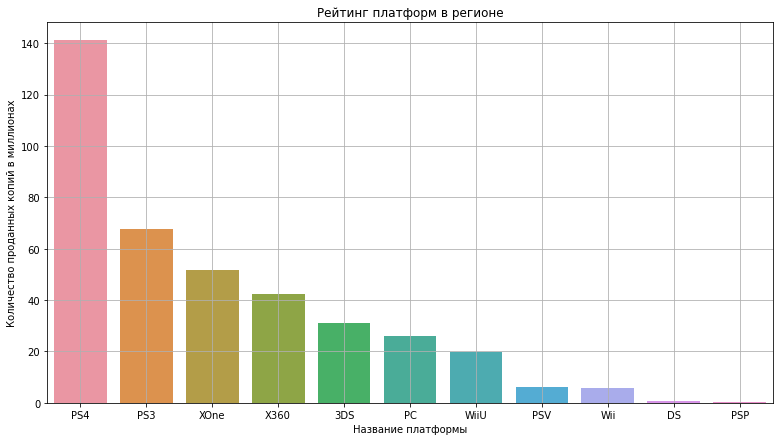

In [81]:
plot_region(actual_games_eu)

Для Европы 5 лидирующих платформ: 'PS4', 'PS3', 'XOne', 'X360', '3DS'. Платформы совпадают с рынком Северной Америки. Также, видно, PS4 популярнее всего в Европе.

#### Общее количество проданных игр по регионам

In [82]:
print("Общее количество проданных копий в Северной Америке: ", actual_games['na_sales'].sum())
print("Общее количество проданных копий в Европе: ", actual_games['eu_sales'].sum())
print("Общее количество проданных копий в Японии: ", actual_games['jp_sales'].sum())


Общее количество проданных копий в Северной Америке:  437.79
Общее количество проданных копий в Европе:  392.71
Общее количество проданных копий в Японии:  141.02


Рынок Японии отличается от Европы и Северной Америки. Рассмотрим причины с точки зрения потенциального покупателя. Население Северной Америки составляет на 2016 год 579 млн. человек, Европы - 750 млн. человек, а Японии - 127 млн. человек. Если исходить из этих цифр, то получается что Япония - самая популярная страна для компьютерных игр. Но если исходить из проданных копий, то основной потребитель - Северная Америка.

### Определение топ-5 жанров игр для каждого региона.

Изменим немного наши функции:

In [83]:
def pivot_genre(region):
    return (actual_games.pivot_table(index='genre', values=region, aggfunc=('count', 'sum'))
            .reset_index()
            .sort_values('sum', ascending=False)
           )

In [84]:
def plot_genre(table):
    plt.figure(figsize=(13, 7))
    sns.barplot(x='genre', y='sum', data=table.sort_values(by='sum', ascending=False))
    plt.title('Рейтинг жанров в регионе')
    plt.xlabel('Жанр игры')
    plt.ylabel('Количество проданных копий в миллионах')
    plt.grid()
    plt.show()

#### топ-5 жанров для Северной Америки

In [85]:
actual_genre_na = pivot_genre('na_sales')
actual_genre_na

genre  count     sum
0         Action    769  126.13
8        Shooter    187  109.74
10        Sports    214   65.27
7   Role-Playing    292   46.40
3           Misc    156   27.49
4       Platform     74   18.14
2       Fighting     80   15.55
6         Racing     85   12.96
1      Adventure    245    7.14
9     Simulation     62    4.86
11      Strategy     56    3.28
5         Puzzle     17    0.83

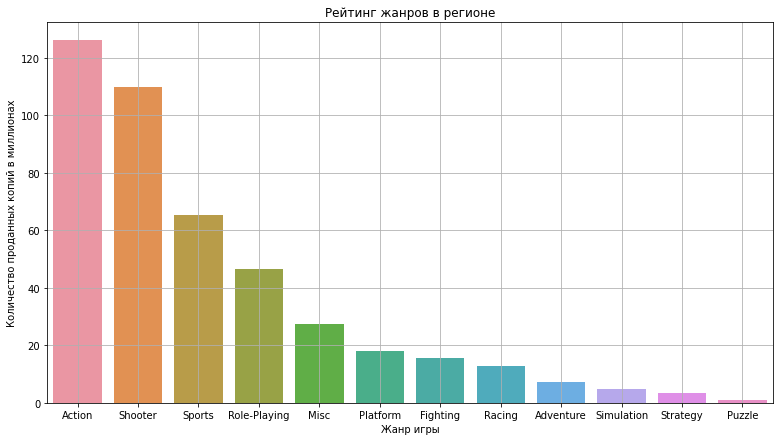

In [86]:
plot_genre(actual_genre_na)

Самые популярные жанры для Северной Америки: Action, Shooter, Sports, Role-Playing, Misc.

#### топ-5 жанров для Европы

In [87]:
actual_genre_eu = pivot_genre('eu_sales')
actual_genre_eu

genre  count     sum
0         Action    769  118.61
8        Shooter    187   87.86
10        Sports    214   60.52
7   Role-Playing    292   36.97
6         Racing     85   20.19
3           Misc    156   20.04
4       Platform     74   15.58
9     Simulation     62   10.92
2       Fighting     80    8.55
1      Adventure    245    8.25
11      Strategy     56    4.22
5         Puzzle     17    1.00

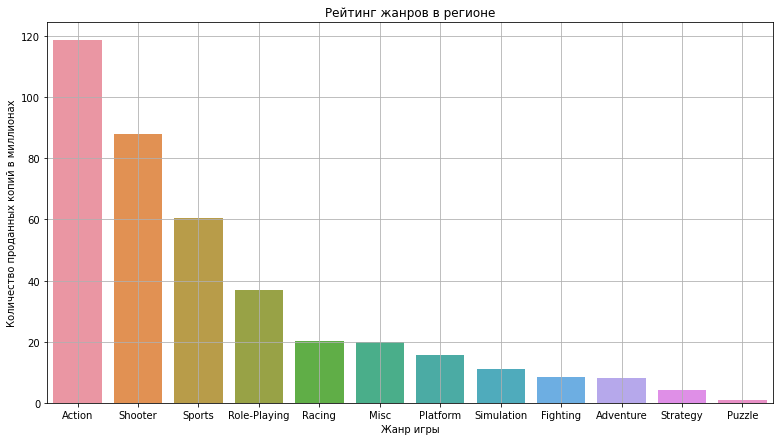

In [88]:
plot_genre(actual_genre_eu)

Самые популярные жанры для Европы: Action, Shooter, Sports, Role-Playing, Racing.

#### топ-5 жанров для Японии

In [89]:
actual_genre_jp = pivot_genre('jp_sales')
actual_genre_jp

genre  count    sum
7   Role-Playing    292  51.04
0         Action    769  40.49
3           Misc    156   9.44
2       Fighting     80   7.65
8        Shooter    187   6.61
1      Adventure    245   5.82
10        Sports    214   5.41
4       Platform     74   4.79
9     Simulation     62   4.52
6         Racing     85   2.30
11      Strategy     56   1.77
5         Puzzle     17   1.18

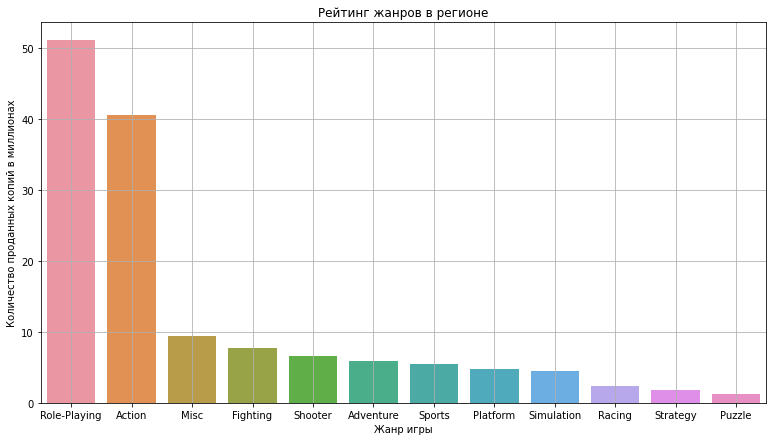

In [90]:
plot_genre(actual_genre_jp)

Самые популярные жанры для Европы: Role-Playing, Action, Misc, Fighting, Shooter.

Краткий вывод: Популярные жанры в Европе и Северной Америке одинаковы, на первых местах: Action и Shooter, в Японии же на первом месте Ролевые игры (Role-Playing), также в 5-ке присутствует жанр Fighting (различные бои, поединки). Такое различие в предпочтениях обуславливается восточной культурой. Айкидо, дзюдо, карате, кюдо многие другие виды боевого искусства происходят из Японии, отсюда и высокий интерес к жанру Fighting.

### Влияние рейтинга ESRB на продажи в отдельном регионе.

Прежде чем посмотреть распределение рейтинга, для удобства и понимания расшифруем возрастные категории:

Т = для лиц старше 13 лет

М = для лиц старше 17 лет

Е = для всех возрастных категорий

E10+ = для лиц старше 10 лет

Теперь посмотрим для каждого региона какая возрастная категория преобладает:

In [91]:
def pivot_rating(region):
    return (actual_games.pivot_table(index='rating', values=region, aggfunc=('count', 'sum'))
            .reset_index()
            .sort_values('sum', ascending=False)
           )

In [92]:
rating_na = pivot_rating('na_sales')
rating_na

rating  count     sum
2      M    372  165.29
4    tbd    978   89.42
0      E    302   79.05
1   E10+    252   54.24
3      T    333   49.79

В Северной Америке рынок больше ориентирован на категорию граждан старше 17 лет.

In [93]:
rating_eu = pivot_rating('eu_sales')
rating_eu

rating  count     sum
2      M    372  145.80
0      E    302   83.36
4    tbd    978   78.91
1   E10+    252   42.69
3      T    333   41.95

В Европе также преобладает категория граждан старше 17 лет.

In [94]:
rating_jp = pivot_rating('jp_sales')
rating_jp

rating  count    sum
4    tbd    978  85.29
3      T    333  20.59
0      E    302  15.14
2      M    372  14.11
1   E10+    252   5.89

А вот в Японии продается больше всего игр для категории граждан страше 13 лет. Компании больше ориентируются на молодое поколение.

## Проверка гипотез

Для проверки обеих гипотез будем использовать t-критерий Стьюдента, так как в обоих случаях выборки независимы между собой.

### Гипотеза № 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы:

Н0 (нулевая гипотеза): средние пользовательские рейтинги платформ Xbox One и PC равны.

Н1 (альтернативная гипотеза): средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [95]:
XOne_rat = df[(df['platform'] == 'XOne') & (df['user_score'] > 0)]['user_score'].to_list()
PC_rat = df[(df['platform'] == 'PC') & (df['user_score'] > 0)]['user_score'].to_list()

In [96]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
XOne_rat,
PC_rat,
equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.101854214173905e-06
Отвергаем нулевую гипотезу


Если нулевая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC равны, отвергнута, есть основания полагать, что между пользовательскими рейтингами платформ Xbox One и PC имеются статистически значимые различия.

### Гипотеза № 2: Средние пользовательские рейтинги жанров Action (экшен-игры) и Sports («спортивные соревнования») разные

Сформулируем нулевую и альтернативную гипотезы:

Н0 (нулевая гипотеза): средние пользовательские рейтинги жанров Action (экшен-игры) и Sports («спортивные соревнования» равны.

Н1 (альтернативная гипотеза): средние пользовательские рейтинги жанров Action (экшен-игры) и Sports («спортивные соревнования» не равны.

In [97]:
action_rat = df[(df['genre'] == 'Action') & (df['user_score'] > 0)]['user_score'].to_list()
sports_rat = df[(df['genre'] == 'Sports') & (df['user_score'] > 0)]['user_score'].to_list()

In [98]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
action_rat,
sports_rat,
equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.08991887133875966
Не получилось отвергнуть нулевую гипотезу


Нет оснований делать вывод о значимом различии между пользовательскими рейтингами. 

## Общий вывод.

Мы провели исследовательский анализ для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игрыпродажах игр. Для анализа нам были предоставлены данные о продажах игр, оценки пользователей и экспертов, жанры и платформы, на которых игры выпускаются.

Прежде, чем приступить к исследовательскому анализу, мы привели в порядок полученные данные:
1. Привели названия столбцов датафрейма к нижнему регистру.
2. В двух строках был пропущены названия игр и жанр, поэтому было принято решение удалить их. Также после частичного заполнения пропусков в столбце с годом релиза игры, осталось 146 необработанных пропусков, заполнить которые не представлялось возможным. Так как год релиза для анализа был критически важен, было принято решение об удалении этих 146-ти строк. 
3. В столбцах: год релиза, оценка критиков и оценка пользователей изменен тип данных.
4. Добавлен столбец, где сохранено общее количество проданных копий по всему миру.

После этого были выведены цифры количества выпущенных игр по годам. Тезисы:
1. Резкий скачек по выпуску игр был в 2002 году, после чего был небольшой спад и начиная с 2005 до 2011 были самые высокие показатели за исследуемый период, потом резкий спад.
2. До 2000 годов игр выпускалось крайне мало. Это связано с тем, что на тот момент были слабые технологии, консолей для игр было также мало и они были дорогие. Персональные компьютеры были доступны незначительной категории граждан. Далее, с развитием технологий, начинается резкий скачок по продажам. Но, чем больше развитие, тем больше требования к играм, поэтому после подъема начинается спад. Это также обусловленно тем, что ранее игры были проще в разработке, на их создание уходило меньше времени. С развитием индустрии и запросом пользователей, многие игры создаются не один год, поэтому игр выпускается меньше. Вместе с тем, могу предположить, что пики 2008-2009 годов связаны с мировым кризисом, люди теряли работу, переживали стресс и поэтому был высокий спрос на игры.

Далее, мы провели анализ платформ по количеству игр и годам. У большинства платформ есть пики по продажам, а потом спады. Это связано с созданием новых платформ, которые поддерживают более своременные технологии, в том числе более качественную графику.

Также, определены 6 платформ с наибольшим количеством проданных копий за весь период:

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Платформы с наименьшим количеством проданных копий: 

"SCD", "NG", "WS", "TG16", "3DO", "GG", "PCFX"

Проанализировав популчрные платформы, сделаны следующие выводы:
1. Платформа PS2 продавала большое количество копий в течение 7-ти лет (в период с 2001-2007 гг).
2. Платформа X360, приносила более менее стабильный доход в виде проданных копий в течение 8 лет (в период с 2006-2013 гг). В 2016 году продажи незначительны.
3. Платформа PS3 в течение 7-8 лет (в период с 2007-2013 гг) приносила хороший доход от проданных копий, но с приходом нового поколения, она устарела и количество проданных копий падает. На смену ей пришла платформа PS4.
4. У платформы Wii самый плодотворный период был в течение 6-ти лет (в период с 2006-2011 гг).
5. Платформа DS продавала наибольшее количество копий в течение 6-ти лет (в период с 2005-2010 гг).
6. Платформа PS определенно является долгожителем, это не удивительно, она была очень популярна, но все равно на смену ей пришли более современные замены, такие как PS2, а после PS3, сейчас PS4.

Далее, я определила средний срок платформы, который равен 7-8 годам. Но также могу предположить, что с каждым годом он будет уменьшаться. Это связано с развитием технологий, улучшенной графикой, общим развитием общества, включающее улучшение благосостояния в целом. Многие вещи становятся более доступными, и смена платформ на более современную является обыденным. Развитие игр приводит к тому, что платформы старого поколения не могут их поддерживать либо отражать современные технологии, поэтому им на смену приходят обновленные и улучшенные версии платформ. Исходя из моих выводов, я определяю для себя актуальный период с 2013 года.

Рассматривая платформы с 2013 года, тут конечно лидирует PS4 и с большим отрывом, неудивительно, ведь все поколения PlayStation пользовались огромной популярностью и PS4 является последней версией, она вышла в ноябре 2013 года и приносит огромную прибыль компании, а старое поколение PS3 было тоже популярно, но сейчас оно идет на спад. Платформа XOne (Xbox One) вышла также в ноябре 2013 года и продает большое количество копий, по сути это ближайший конкурент PlayStation. Платформа X360 вышла в 2005 году, но до сих пор приносит хорошую прибыль, но я думаю, что в ближайшем будущем эта консоль перестанет быть актуальной. Еще, рассмотрим платформу WiiU, она выпущена в ноябре 2012 года. Учитывая, что игры на данной приставке проще и дешевле, да и сама платформа в изготовлении бюджетнее, она продает хорешее количество для своих характеристик.

На графике в актуальный период также выделялись платформы PS4 и XOne, которые приносят высокую прибыль своим компаниям. С 2016 года начался спад. Причинами этого может быть множество факторов, такие как ожидание новых игр(в связи с ростом технологий, игры стали много сложнее в создании, многие из них создаются в течение нескольких лет), так и мы можем предположить, что у нас не все данные по 2016 году, может быть и вообще спада нет. На реальной практике, нужно конечно такие моменты уточнять. 

В среднем все платформы приносит порядка 0,5 миллионов копий, но есть и рекордсмены, которые продают и по 21 млн. Также, если посмотреть на ящик, можно сделать вывод, что число проданных копий свыше 5 млн. встречаются крайне редко. Краткие тезисы по популярным платформам:
1. Средние значения PS4 порядка 800 тысяч копий, но PS4 выпускала на своей платформе много довольно популярных игр, которые продавались тиражом свыше 14 млн. копий. Вместе с тем, данная платформа лидирует по количеству выпущенных игр, это говорит об ее актуальности и популярности.
2. У PS3 среднее количество проданных копий 525 тысяч. 
3. XOne имеет хорошие средние показатели в размере 645 тысяч копий за игру. Игр на данной платформе выпускается в полтора раза меньше, чем на РS4, но она является, как ранее говорила, ближайшим конкурентом РS4.
4. Средний показатель платформы 3DS - 472 тысячи копий. Данная платформа выпущена в марте 2011 года и исходя из продолжительности срока актуальности платформ, в 2017 году популярность ее будет низкая.
5. У платформы X360 довольно неплохие средние показатели за указанный период (свыше 700 тысяч копий), но она уже устарела и теряет свою популярность.

Я бы обратила внимание также на платформу WiiU. На ней выпускается небольшое количество игр, но средние показатели по продажам довольно высокие(562 тысячи проданныз копий за игру). Так, больше всего игр выпускается на платформе PS4, меньше всего WiiU, но эти платформы не совсем корректно сравнивать, так как характеристики у них разные, выпускаемые игры тоже. WiiU является беспроводной приставкой для простых игр, в отличие от PS4.

Проанализировав корреляцию между отзывами и продажами среди 6-ти самых популярных платформ, могу сделать вывод, что потенциальные покупатели практически не обращают внимания на отзывы пользователей, в большей степени ориентируясь на оценки критиков. Поэтому оценка критиков очень важна и она влияет на продажи.

4 самых популярных жанра по всему миру, исходя из медианных значений: 

Shooter (450 тысяч)

Sports (240 тысяч)

Platform (225 тысяч)

Что касается жанра игры, то я думаю, что для каждого пользователя свой жанр или даже несколько. Если пазлы имеют самые низкие по продажам показатели (3,17 млн. копий), то это не говорит о том, что необходимо отказываться от этих игр.  


Топ-5 популярных платформ по регионам:

Северная Америка: 'PS4', 'PS3', 'XOne', '3DS', 'X360'

Япония: 3DS, PS3, PSV, PS4, WiiU

Европа: 'PS4', 'PS3', 'XOne', 'X360', '3DS'


Топ-5 популярных жанров по регионам:

Северная Америка: Action, Shooter, Sports, Role-Playing, Misc

Япония: Role-Playing, Action, Misc, Fighting, Shooter

Европа: Action, Shooter, Sports, Role-Playing, Racing

Популярные жанры в Европе и Северной Америке одинаковы, на первых местах: Action и Shooter, в Японии же на первом месте Ролевые игры (Role-Playing), также в 5-ке присутствует жанр Fighting (различные бои, поединки). Такое различие в предпочтениях обуславливается восточной культурой. Айкидо, дзюдо, карате, кюдо многие другие виды боевого искусства происходят из Японии, отсюда и высокий интерес к жанру Fighting.

Исходя из рейтинга ESRB сформулированы следующие выводы:
1. В Северной Америке  и Европе рынки больше ориентированы на категорию граждан старше 17 лет.
2. В Японии продается больше всего игр для категории граждан страше 13 лет. Компании больше ориентируются на молодое поколение.

Были проверены 2 гепотезы: 

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для этого сформулированы нулевая и альтернативная гипотезы:

Н0 (нулевая гипотеза): средние пользовательские рейтинги платформ Xbox One и PC равны.

Н1 (альтернативная гипотеза): средние пользовательские рейтинги платформ Xbox One и PC не равны.

Для оценки применен критерий Стюдента, по результатам которого нулевая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC равны, отвергнута. Это дает основания полагать, что между пользовательскими рейтингами платформ Xbox One и PC имеются статистически значимые различия.

2. Средние пользовательские рейтинги жанров Action (экшен-игры) и Sports («спортивные соревнования») разные. Для этого сформулированы нулевая и альтернативная гипотезы:

Н0 (нулевая гипотеза): средние пользовательские рейтинги жанров Action (экшен-игры) и Sports («спортивные соревнования» равны.

Н1 (альтернативная гипотеза): средние пользовательские рейтинги жанров Action (экшен-игры) и Sports («спортивные соревнования» не равны.

Для оценки также был применен критерий Стюдента. По результатам теста нет оснований делать вывод о значимом различии между пользовательскими рейтингами. 

Общие рекомендации бизнесу:

1. Покупать вышедшие и новые игры на PS4, XOne, так как это современные платформы, которые будут актуальны в 2017 году.
2. Основной потребитель игр, это покупатель возраста старше 17 лет. На эту возрастную категорию ориентироваться. Если продумывать рекламные кампании, то для Японии учитывать, что там возрастная категория стрше 13 лет.
3. Акцент делать на следующие жанры игр: Shooter, Action, Sports, Role-Playing, Platform
4. Если магазину необходимо выбрать приоритетный рынок, то я бы рекомендовала Северную Америку, в связи с высокими продажами игр.
5. С развитием технологий, продолжительность жизни платформ будет уменьшаться.

Также, я бы хотела отметить, что не стоит другие магазину закупать исключительно игры самых популярных жанров, жанров игр большое разнообразие и все в той или иной степени продаются. Хороший магазин должен иметь большой ассортимент, необходимо лишь учесть приоритеты, и менее популярные жанры закупать в меньшем количестве.


